# Backpropogation (Cross Entropy Cost Function)

In [18]:
import math
import matplotlib.pyplot as plt
import random

### Define the transfer functions

In [19]:
def transfer_function(x, x0):
    return math.tanh(x/(2 * x0))

def derivative_transfer_function(x, x0):
    f = transfer_function(x, x0)
    return (0.5 * (1 + f) * (1 - f))/x0

### Define the number of neurons for the input and hidden layers<br/>Specify input neurons, target vector, learning rate and tolerance along with other parameters

In [20]:
NumInputNeurons = 2
NumHiddenNeurons = 4
NumOutputNeurons = 1

input_neurons = [[1, 1], [1, -1], [-1, 1], [-1, -1]]
target_vector = [-1, 1, 1, -1]
learning_rate = 0.2
C = 1.0
x0 = 1.0
tolerance = 0.05

### Initialize the weights and biases to hidden and output layers

In [21]:
weights_hidden = []
for i in range(NumInputNeurons):
    weights = []
    for j in range(NumHiddenNeurons):
        weights.append(random.uniform(-C, C))
    weights_hidden.append(weights)

bias_hidden = []
weights_output = []
for i in range(NumHiddenNeurons):
    bias_hidden.append(random.uniform(-C, C))
    weights_output.append(random.uniform(-C, C))

bias_output = random.uniform(-C, C)

### Initialize output varibles for hidden and output layers

In [22]:
z_in = []
z = []
delta_hidden = []
for i in range(NumHiddenNeurons):
    z_in.append(0.0)
    z.append(0.0)
    delta_hidden.append(0.0)

delta_output = 0.0

y_in = 0.0
y = 0.0

### Run the backpropogation algorithm for the specified number of epochs or until the termination condition is satisfied

In [23]:
squared_errors = []

epochs = 100000
for epoch in range(epochs):
    squared_error = 0
    for input_index in range(len(input_neurons)):
        weights_hidden_delta = []
        for i in range(NumInputNeurons):
            weights = []
            for j in range(NumHiddenNeurons):
                weights.append(0.0)
            weights_hidden_delta.append(weights)

        bias_hidden_delta = []
        weights_output_delta = []
        for i in range(NumHiddenNeurons):
            bias_hidden_delta.append(0.0)
            weights_output_delta.append(0.0)

        bias_output_delta = 0.0

        for i in range(NumHiddenNeurons):
            z_in[i] = bias_hidden[i]
            for j in range(NumInputNeurons):
                z_in[i] = z_in[i] + (weights_hidden[j][i] * input_neurons[input_index][j])
            z[i] = transfer_function(z_in[i], 1)

        y_in = bias_output
        for i in range(NumHiddenNeurons):
            y_in = y_in + (weights_output[i] * z[i])
        y = transfer_function(y_in, 1)

        error = y - target_vector[input_index]
        squared_error = squared_error + math.pow(error, 2)

        delta_output = (-2 / (y + target_vector[input_index])) * derivative_transfer_function(y_in, x0)
        for i in range(NumHiddenNeurons):
            weights_output_delta[i] = learning_rate * delta_output * z[i]
            delta_hidden[i] = delta_output * weights_output[i] * derivative_transfer_function(z_in[i], 1)
        bias_output_delta = learning_rate * delta_output

        for i in range(NumHiddenNeurons):
            for j in range(NumInputNeurons):
                weights_hidden_delta[j][i] = learning_rate * delta_hidden[i] * input_neurons[input_index][j]
            bias_hidden_delta[i] = learning_rate * delta_hidden[i]

        for i in range(NumHiddenNeurons):
            weights_output[i] = weights_output[i] - weights_output_delta[i]
        bias_output = bias_output - bias_output_delta

        for i in range(NumHiddenNeurons):
            for j in range(NumInputNeurons):
                weights_hidden[j][i] = weights_hidden[j][i] - weights_hidden_delta[j][i]
            bias_hidden[i] = bias_hidden[i] - bias_hidden_delta[i]

    squared_errors.append(squared_error)
    if squared_error < tolerance:
        print (epoch+1)
        break

62


### Plot the graph of total error vs epochs

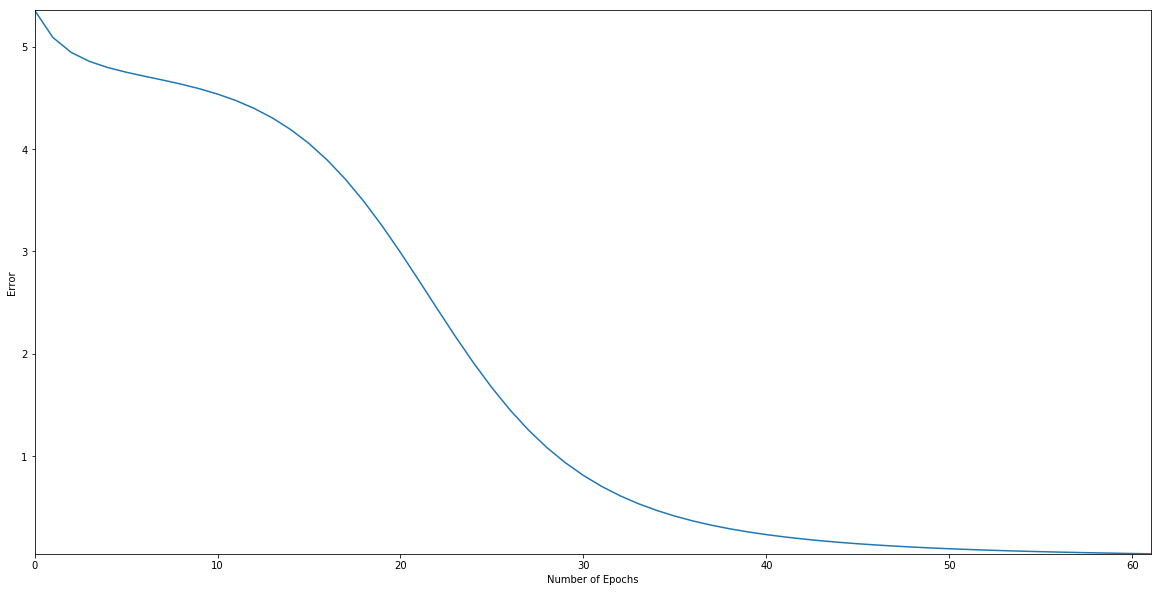

In [24]:
num_epoch = []
for i in range(len(squared_errors)):
    num_epoch.append(i)

plt.figure(figsize=(20, 10))
plt.plot(num_epoch, squared_errors)
plt.ylabel("Error")
plt.xlabel("Number of Epochs")
plt.margins(0)
plt.show()